In [1]:
from edc import check_compatibility
check_compatibility("user-2022.02", dependencies=["GEODB"])



---------

The following environment variables are available:

* `GEODB_AUTH_AUD`, `GEODB_AUTH_CLIENT_ID`, `GEODB_AUTH_DOMAIN`, `GEODB_API_SERVER_URL`, `GEODB_AUTH_CLIENT_SECRET`, `GEODB_API_SERVER_PORT`


# How to access IACS Spatial Data

_Easily access publicly available georeferenced LPIS/GSAA data in a homogenised format through the [marketplace](https://eurodatacube.com/marketplace)._

In this notebook, you will be guided through the steps to access LPIS/GSAA data purchased through the [IACS Spatial Data](https://eurodatacube.com/marketplace/data-products/lpis) tile in the Marketplace.

In [2]:
# Import libraries
from edc import setup_environment_variables
from xcube_geodb.core.geodb import GeoDBClient
import pandas as pd

## 1. List available collections

In the following steps we will list the `geodb` collections that are available to you. By default, a certain number of collections are available freely for demonstration purposes. Once you have purchased the data for a or multiple EU member states, the collections will appear in the list.

### Fetch the GeoDB client

In [3]:
geodb = GeoDBClient()

### Check your username

In the next cell we will print our `geodb` username.

In [4]:
geodb.whoami

'geodb_418dfeac-15f0-4606-9edb-fd9eb722bf04'

### List the collections currently accessible in the `lpis_iacs` database

Even if you haven't yet purchased the access to a collection, you should be able to see the free datasets available for demonstration purposes.

In [5]:
my_collection = geodb.get_my_collections(database="lpis_iacs")

# Print list of collections accessible
my_collection

,owner,database,collection,table_name
0,geodb_lpis_iacs_admin,lpis_iacs,land_use_slo,land_use_slo
1,geodb_lpis_iacs_admin,lpis_iacs,lpis_aut,lpis_aut
2,geodb_lpis_iacs_admin,lpis_iacs,lpis_slo,lpis_slo
3,geodb_lpis_iacs_admin,lpis_iacs,metadata,metadata


## 2. Access a specific collection

Now that we have listed the available collections, we will see how to access a specific collection. For further information on how to manipulate the collection, you can refer to the following tutorial notebooks:

- [GeoDB: Manage Datasets](https://eurodatacube.com/marketplace/notebooks/curated/EDC_GeoDB_1_manage-datasets.ipynb)
- [GeoDB: Explore Datasets](https://eurodatacube.com/marketplace/notebooks/curated/EDC_GeoDB_2_explore-datasets.ipynb)
- [GeoDB: Sharing Data](https://eurodatacube.com/marketplace/notebooks/curated/EDC_GeoDB_3_share-datasets.ipynb)

For this example, we will access a free demonstration dataset called `land_use_slo` in the `lpis_iacs` database. This dataset represents Land Use / Land Cover for Slovenia in 2018. Since it is a large collection, we will limit the request to the first 20 entries. 

In [6]:
gdf = geodb.get_collection_pg('land_use_slo', database='lpis_iacs', limit=20)

### Print the requested dataset

In [7]:
gdf

,id,raba_pid,raba_id,d_od,d_update,geometry
0,22471646,5459813,1410,2018-07-12,2018-09-30,"POLYGON ((542311.535 123362.572, 542309.364 12..."
1,22471647,5746220,1410,2017-12-08,2018-09-30,"POLYGON ((420840.603 107075.637, 420849.287 10..."
2,22471648,193343,3000,2018-01-16,2018-09-30,"POLYGON ((442803.656 137529.248, 442804.091 13..."
3,22471649,194873,1300,2018-01-09,2018-09-30,"POLYGON ((439352.299 134305.554, 439344.578 13..."
4,22471650,5462680,1600,2018-07-12,2018-09-30,"POLYGON ((540144.148 116401.071, 540141.327 11..."
5,22471651,193915,2000,2018-01-08,2018-09-30,"POLYGON ((432152.031 135118.672, 432154.848 13..."
6,22471652,192663,1300,2018-01-10,2018-09-30,"POLYGON ((436629.587 136928.225, 436622.218 13..."
7,22471653,5460549,3000,2017-01-23,2018-09-30,"POLYGON ((511637.792 135223.281, 511645.131 13..."
8,22471654,5746228,1410,2017-12-08,2018-09-30,"POLYGON ((419813.958 106567.429, 419808.343 10..."
9,22471655,5746274,1800,2018-02-06,2018-09-30,"POLYGON ((443378.053 51641.328, 443372.860 516..."


### Plot the collection based on a specific column

First, we will query the dataset for a given area, using the `get_collection_by_bbox` method.

In [8]:
# Get bounding box coordinates for Ljubljiana in EPSG: 3794
lju_coords = (456543, 99294, 460617, 103213)


# Fetch collection in the given bounding box
gdf_lju = geodb.get_collection_by_bbox('land_use_slo', database='lpis_iacs', bbox = lju_coords, comparison_mode="contains", bbox_crs=3794)

Then we can easily plot the sampled data by one of it's attributes.

<AxesSubplot:>

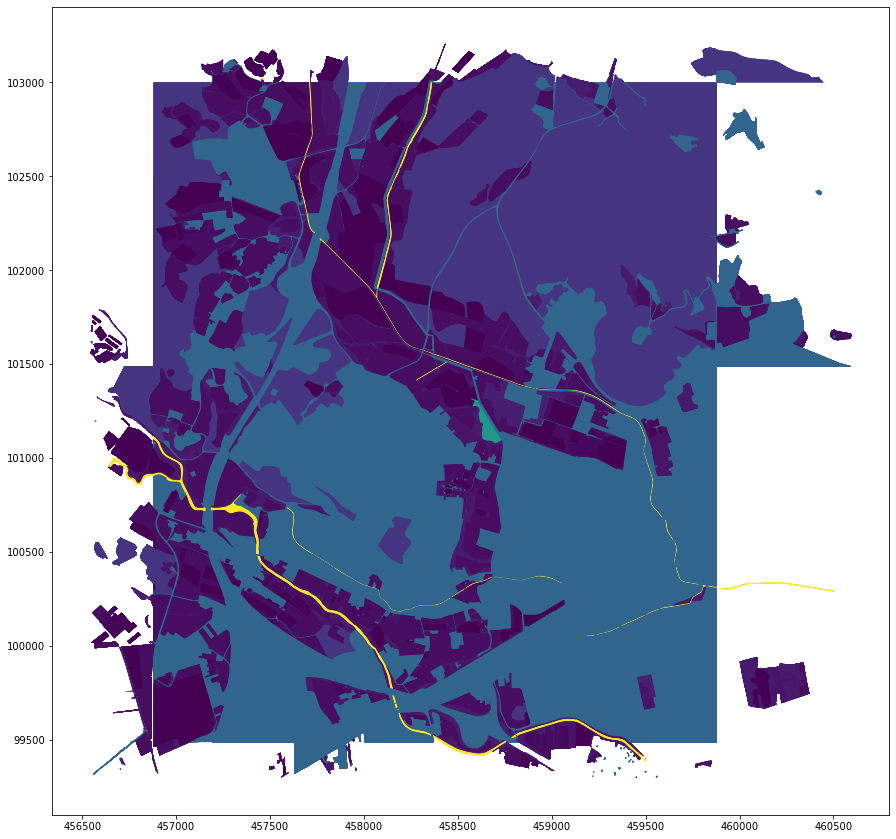

In [9]:
gdf_lju.plot(column="raba_id", figsize=(15,15), cmap = 'viridis')